In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as mc

In [2]:
# from https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

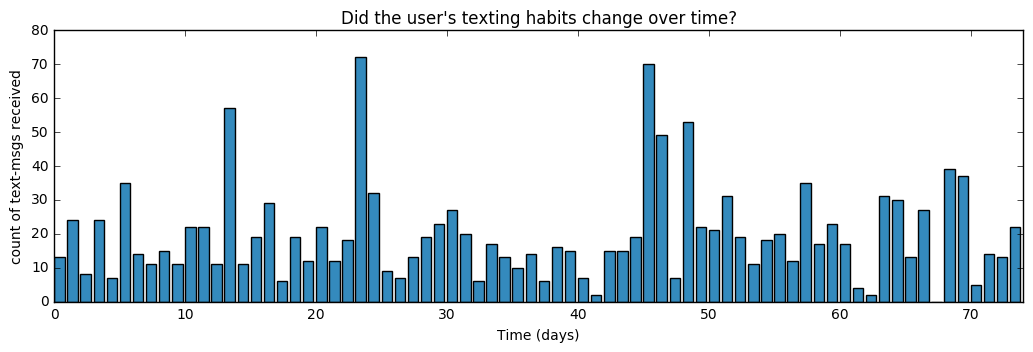

In [3]:
url = 'https://raw.githubusercontent.com/CamDavidsonPilon/'
url += 'Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/'
url += 'Chapter1_Introduction/data/txtdata.csv'
count_data = pd.read_table(url, header = None).iloc[:, 0].values
n_count_data = len(count_data)

plt.figure(figsize = (12.5, 3.5))
plt.bar(np.arange(n_count_data), count_data, color ="#348ABD")
plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)
plt.show()

In [5]:
alpha = 1.0 / count_data.mean()

model = mc.Model()

with model:
    lambda_1 = mc.Exponential('lambda_1', alpha)
    lambda_2 = mc.Exponential('lambda_2', alpha)
    tau = mc.DiscreteUniform('tau', lower = 0, upper = n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.
